In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_yelp = pd.read_csv('yelp.csv')

In [3]:
df_yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [18]:
X = df_yelp['text'].values
y = df_yelp['stars']

In [13]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

0       5
1       5
2       4
3       5
4       5
       ..
9995    3
9996    4
9997    4
9998    2
9999    5
Name: stars, Length: 10000, dtype: int64

In [35]:
import string
from nltk.corpus import stopwords

In [42]:
def message_improve(X):
    X_punc = [char for char in X if char not in string.punctuation]
    X_punc_join = ''.join(X_punc)
    X_train_punc_join_clean = [word for word in X_punc_join.split() if word.lower() not in stopwords.words('english') ]
    return X_train_punc_join_clean

In [49]:
X['text'][0]

TypeError: list indices must be integers or slices, not str

In [55]:
X = df_yelp['text'].values
y = df_yelp['stars']

In [56]:
y

0       5
1       5
2       4
3       5
4       5
       ..
9995    3
9996    4
9997    4
9998    2
9999    5
Name: stars, Length: 10000, dtype: int64

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(analyzer=message_improve)
yelp_countvectorizer = vector.fit_transform(X)
# vector.transform(y)

In [59]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = y.values
NB_classifier.fit(yelp_countvectorizer,label)

MultinomialNB()

In [60]:
X = yelp_countvectorizer
y =label

In [62]:
X.shape

(10000, 44012)

In [63]:
y.shape

(10000,)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.22)

In [80]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [81]:
X_pred = NB_classifier.predict(X_test)


<AxesSubplot:>

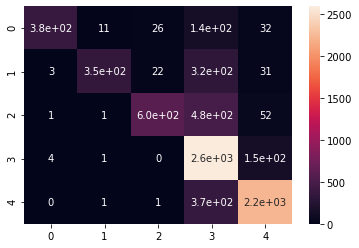

In [84]:
y_pred_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

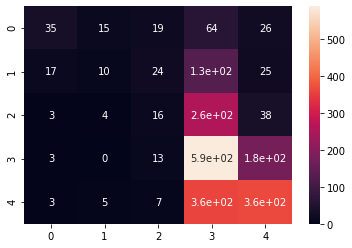

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,X_pred)
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_test, X_pred))

              precision    recall  f1-score   support

           1       0.57      0.22      0.32       159
           2       0.29      0.05      0.08       205
           3       0.20      0.05      0.08       318
           4       0.42      0.76      0.54       780
           5       0.58      0.49      0.53       738

    accuracy                           0.46      2200
   macro avg       0.41      0.31      0.31      2200
weighted avg       0.44      0.46      0.41      2200



In [89]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.98      0.64      0.77       590
           2       0.96      0.48      0.64       722
           3       0.93      0.53      0.67      1143
           4       0.66      0.94      0.78      2746
           5       0.89      0.86      0.88      2599

    accuracy                           0.79      7800
   macro avg       0.88      0.69      0.75      7800
weighted avg       0.83      0.79      0.78      7800



# 追加でやる

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf.shape)

(10000, 44012)


In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer()


In [94]:
yelp_tfidf = yelp_tfidf.fit_transform(yelp_countvectorizer)

In [93]:
X = yelp_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

TypeError: Singleton array array(TfidfTransformer(), dtype=object) cannot be considered a valid collection.